# Predecir la espectativa de vida de los individuos segun informacion de diversos paises a lo largo de un rango acotado de años.

## Abstract

A lo largo de esta notebook se conocera la espectativa de vida de cada uno de los paises, se intentara determinar cuales son aquellas variables que influyen mas en esta estadistica y se intentara alcanzar un modelo capaz de predecir la espectativa de vida de un individuo o grupo de individuos segun ciertos atributos o parametros que este poseea

## Objetivo

Poder establecer un modelo capaz de predecir la espectativa de vida y mostrar que factores influyen en ella para presentar un paquete de planes y politicas de desarrollo a paises que tengan intencion de mejorar sus estadisticas sanitarias.

Se pretende elaborar un modelo que pueda responder a la pregunta ¿ Cual sera la espectativa de vida de los individuos de una población? 

## Contexto analitico

Para poder atacar esta problematica se cuenta con un dataset con las espectativas de vida de varios de los paises del mundo y variables de interes de cada uno de ellos a lo largo de aproximadamente una decada y separados por año.

Para esto se cuenta con el dataset: 
* Life_Expectancy_Data.csv



## Objetivo

Poder establecer un modelo capaz de predecir la espectativa de vida y mostrar que factores influyen en ella para presentar un paquete de planes y politicas de desarrollo a paises que tengan intencion de mejorar sus estadisticas sanitarias.

In [220]:
import pandas as pd
from   scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as Rectangle
import random
import seaborn as sns
import statsmodels.formula.api as sma
import chart_studio.plotly     as py
import os
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
import pingouin
bokeh.io.output_notebook(INLINE)

Loading BokehJS ...

# Exploratory Data Analisis (EDA)
##### Vamos a ver como está compuesto nuestro dataset para asi poder empezar a analizar que es lo que nos va a importar para alcanzar nuesto objetivo.


In [146]:
df = pd.read_csv('../Data/Life_Expectancy_Data.csv')

In [147]:
df.head()


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [148]:
df.shape

(2938, 22)

In [149]:
df =df.dropna()


In [150]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### Como podemos ver, nuestro dataset se compone de las siguientes columnas y filas: 
1. **Country:** Pais
2. **Year:** Año
3. **Status:** Estado del Pais (Developing o Developed)
4. **Life expectancy:** Espectativa de vida en edad 
5. **Adult Mortality:** Mortalidad Adulta para ambos sexos (probabilidad de morir entre 15 y 60 años cada 1000 habitantes)
6. **infant deaths:** Número de muertes infantiles cada 1000 habitantes
7. **Alcohol:** Consumo de alcohol por persona (mayor a 15 años) en litros
8. **percentage expenditure:** Gasto en Saludo como porcentage del PBI 
9. **Hepatitis B:** Cobertura de inmunizacion contra la Hepatitis B en niños de 1 año
10. **Measles:** Numero de casos reportados de sarampion cada 1000 habitantes
11. **BMI:** Promedio de Indice de Masa Corporal de toda la poblacion
12. **under-five deaths:** Numero de muertes cada 1000 habitantes de niños menores de 5 años
13. **Polio:** Covertura de inmunizacion contra la Polio en niños de 1 año de edad
14. **Total expenditure:** Gasto total en salud del gobierno como porcentaje del gasto total del gobierno
15. **Diphtheria :** Covertura de inmunizacion de DTP3(Difteria, Tetanos y Tos Ferina) en niños de 1 año 
16. **HIV/AIDS:** Muertes cada 1000 nacidos vivos VIH/SIDA (0-4 años)
17. **GDP:** Producto Bruto Interno o Producto Interno Bruto
18. **Population:** Poblacion del País
19. **thinness  1-19 years:** Prevalencia de delgadez en niños y adolescentes de 10 a 19 años (%)
20. **thinness 5-9 years:** Prevalencia de delgadez en niños de 5 a 9 años (%)
21. **Income composition of resources:** Índice de Desarrollo Humano en términos de composición de ingresos de los recursos (índice que va de 0 a 1)
22. **Schooling:** Número de años de escolaridad (años)


Procederemos ahora a graficar algunas variables de relevancia aplicando distintos tipos de graficas para tratar de sacarle el mayor provecho a la información



In [151]:
df.Status.value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

# Graficamos informacion relevante

### Grafica de expectativa de vida por pais. 
#### Se decide plotear cada uno individual por la cantidad de paises existentes dado que no queda visible en un solo grafico toda la info.

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


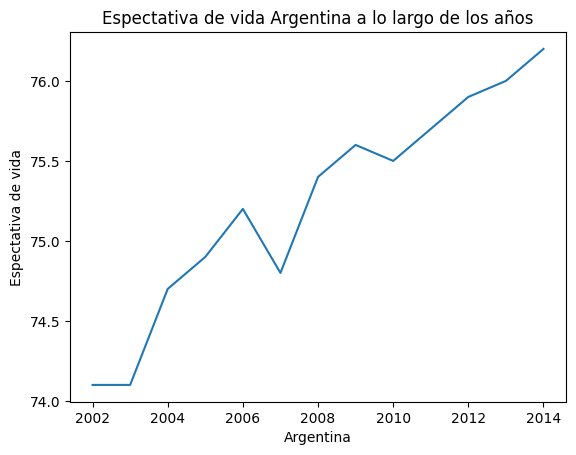

In [152]:
print(df.columns.tolist())

df_espectativa = df[["Country","Year", 'Life expectancy ']].copy()

## Imprime todas las grafiacas de todos los paises, mucho tiempo de procesamiento y baja calidad de visualizacion
#paises = copia_df.groupby("Country")

#for i, (name,group) in enumerate(paises):
#  group.plot(x="Year",y="Life expectancy ", xlabel = name, ylabel='Life Expectancy')

df_espectativa= df_espectativa[(df_espectativa['Country']== 'Argentina')]

plt.plot("Year","Life expectancy ",data = df_espectativa)

plt.xlabel('Argentina')
plt.ylabel('Espectativa de vida')
plt.title('Espectativa de vida Argentina a lo largo de los años')
#plt.legend()
plt.show()


## Mortandad de diferentes enfermedades 

##### La idea es poder ver graficamente como estan los indicadores estadisticos principales para cada enfermedad en todos los paises y a lo largo de los años de los que se tienen datos.

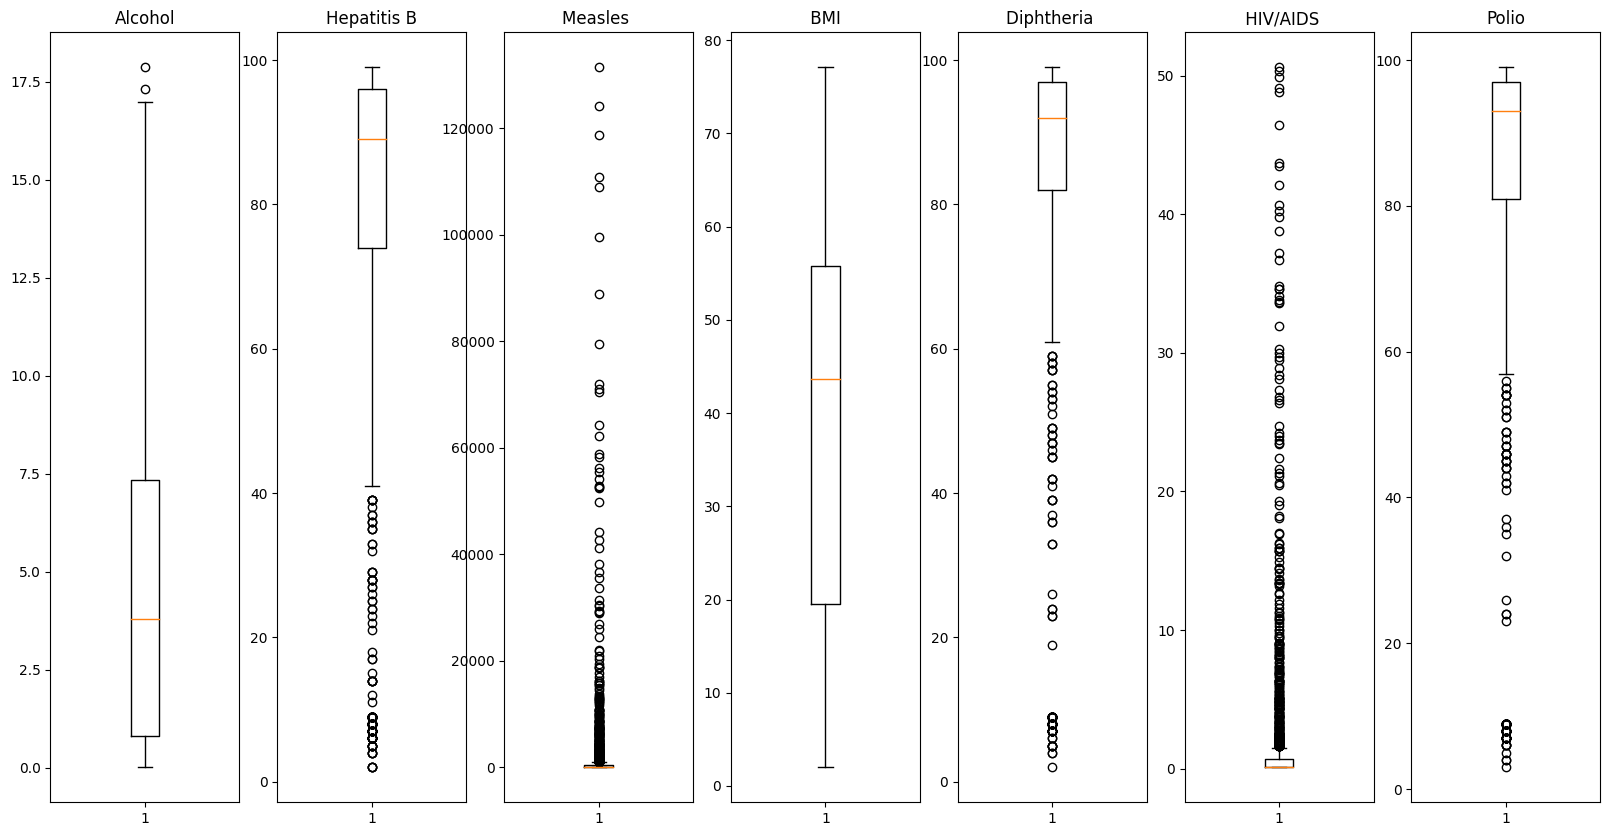

In [153]:

df_mortandad = df[['Alcohol', 'Hepatitis B','Measles ', ' BMI ', 'Diphtheria ',' HIV/AIDS', 'Polio']].copy()
df_mortandad.head(100)
df_mortandad = df_mortandad.dropna()

fig, axs = plt.subplots(1,7,figsize=(20, 10))

keys=df_mortandad.columns.tolist()
len(df_mortandad.columns)

for i in ( range(len(df_mortandad.columns))):
    axs[i].boxplot(df_mortandad[df_mortandad.columns[i]])
    axs[i].set_title(df_mortandad.columns[i])
plt.show()

#### Se puede apreciar que:
* media de la poblacion total tiene un consumo de aproximadamente 3 litros de alcohol al año
* La covertura de vacunacion es relativamente alta, aunque existen paises donde este indice es muy bajo o casi nulo.
* El BMI o indice de masa corporal presenta valores relativamente altos. La media se encuentra en el rango de Obesidad, lo qué según diversas organizaciones de salud contribuye a aumentar el riesgo de muerte  

# Evolucion de la vacunacion contra la hepatitis B a lo largo de los años en el mundo

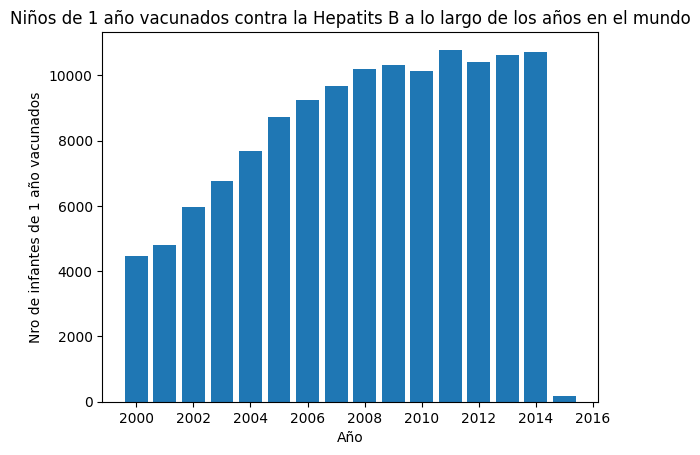

In [154]:
df_hepatitis = df[['Year','Hepatitis B']].copy()

anios = df_hepatitis.groupby(df_hepatitis["Year"])["Hepatitis B"].sum()

plt.bar(anios.index,anios.values)

plt.xlabel('Año')

plt.ylabel('Nro de infantes de 1 año vacunados')

plt.title('Niños de 1 año vacunados contra la Hepatits B a lo largo de los años en el mundo')

plt.show()

## Grafica de Mortalidad adulta para Argentina, Suecia y Tunez , periodo 2000-2015. Valores cada 1000 habitantes


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'mortalidad'),
 Text(0.5, 1.0, 'Mortalidad adulta x anio')]

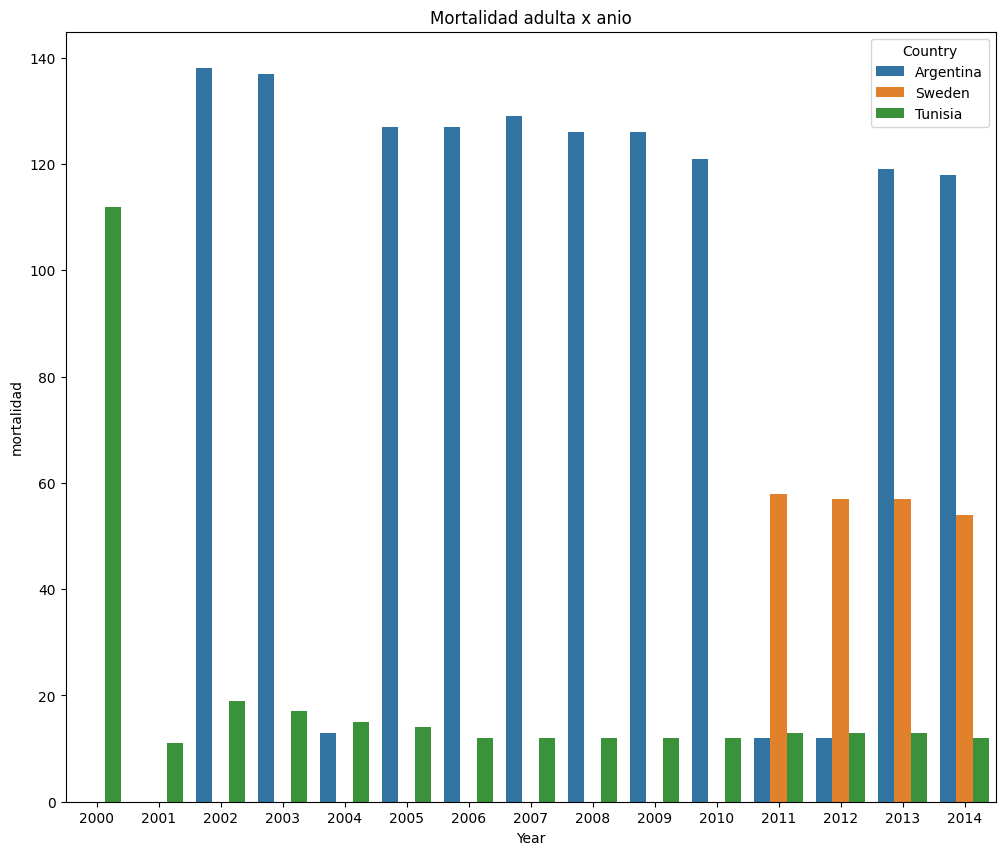

In [155]:
df_mortalidad = df[['Country','Year','Adult Mortality']].copy()

df_mortalidad = df_mortalidad[(df_mortalidad['Country']== 'Argentina') | (df_mortalidad['Country']== 'Sweden') | (df_mortalidad['Country']== 'Tunisia')]

df_mortalidad.head(100)

plt.figure(figsize=(12,10))

ax= sns.barplot(data =df_mortalidad, x='Year',y ='Adult Mortality',  hue= 'Country',fill= True,)

ax.set(xlabel = 'Year', ylabel = 'mortalidad', title = 'Mortalidad adulta x anio')


## Grafica de Porcentaje total de PBI invertido en salud respecto a la cantidad de poblacion de cada pais



[Text(0.5, 0, 'Gasto total en salud %PBI'),
 Text(0, 0.5, 'PBI'),
 Text(0.5, 1.0, 'Gasto total en salud de Argentina, Suecia, y Tunez')]

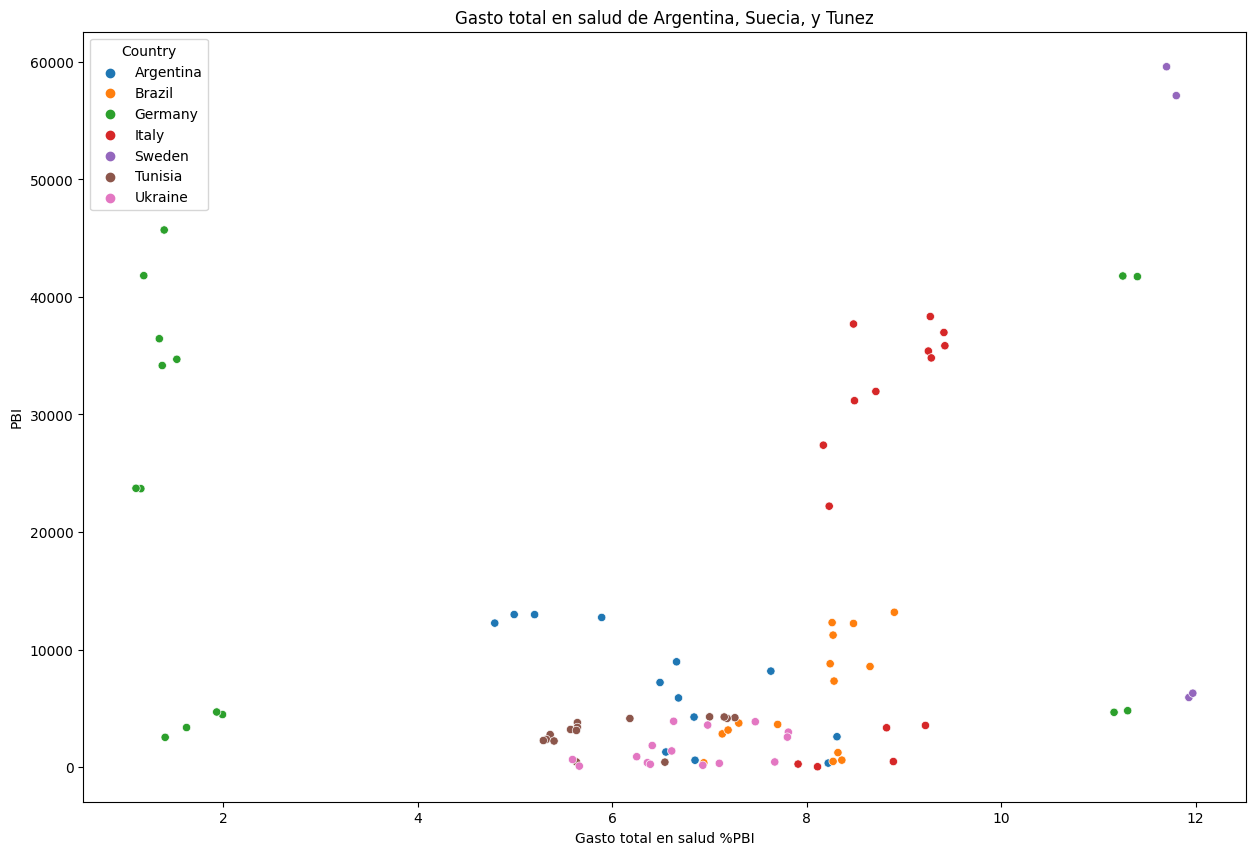

In [156]:
df_mortalidad = df[['Country', 'GDP','Total expenditure']].copy()

df_mortalidad = df_mortalidad[(df_mortalidad['Country']== 'Argentina') | (df_mortalidad['Country']== 'Sweden') | (df_mortalidad['Country']== 'Tunisia')| (df_mortalidad['Country']== 'Italy')| (df_mortalidad['Country']== 'Brazil')
                              | (df_mortalidad['Country']== 'San Marino')| (df_mortalidad['Country']== 'Ukraine')| (df_mortalidad['Country']== 'Germany')]

plt.figure(figsize=(15,10))

ax= sns.scatterplot(data =df_mortalidad, x='Total expenditure', y ='GDP',  hue= 'Country')

ax.set(xlabel = 'Gasto total en salud %PBI', ylabel = 'PBI', title = 'Gasto total en salud de Argentina, Suecia, y Tunez')

# Relacion años de escolaridad vs indice de desarollo humano


[Text(0.5, 0, 'índice de Desarrollo Humano'),
 Text(0, 0.5, 'densidad de escolarizacion'),
 Text(0.5, 1.0, 'Relación de escolaridad con indice de desarrollo humano')]

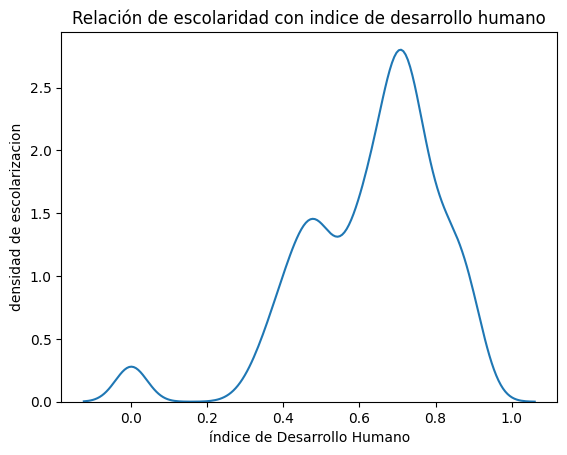

In [157]:
df_mortalidad = df[['Income composition of resources', 'Schooling']].copy()
plt.figure()
ax= sns.kdeplot(data =df_mortalidad['Schooling'], x =df_mortalidad['Income composition of resources'] )
ax.set(xlabel = 'índice de Desarrollo Humano', ylabel = 'densidad de escolarizacion', title = 'Relación de escolaridad con indice de desarrollo humano')

### Pregunta 1: 
#### Que relacion existe entre el Status de un pais y la espectativa de Vida?  La idea es poder determinar si existe un grado de relacion determinante entre estas dos variables

### Ploteamos la relacion entre la espectativa de vida y el estado de desarrollo de los paises

Text(0.5, 1.0, 'Espectativa de vida versus estado de desarrollo')

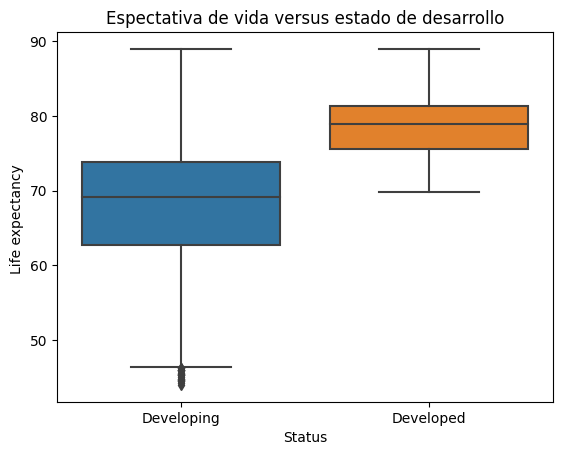

In [158]:
sns.boxplot(x='Status', y= 'Life expectancy ', data= df)
plt.title('Espectativa de vida versus estado de desarrollo')

 Se puede apreciar que los paises desarrollados poseen una espectativa de vida mas concentrada entre 70 y 90 con una media en 80 mientras que los paises en desarrollo tienen una media de 70 anios pero con una amplia variacion incluso alcanzando valores por debajo de los 40 anios. A simple vista parece ser que esta variable va a tener un importante peso en el modelo pero tal vez no determinante.

### Pregunta 2:
#### Los paises con espectativa de vida mas baja presentan un GDP mas bajo? Intenta visualizar algun tipo de relacion entre el GDP del pais (Tomado como GDP mas alto, mejor status economico y GDP mas bajo menor status economico) y la espectativa de vida.

#### Procedemos a evaluar la realcion entre el PBI per capita y la espectativa de vida. 

Text(0, 0.5, 'Espectativa de vida')

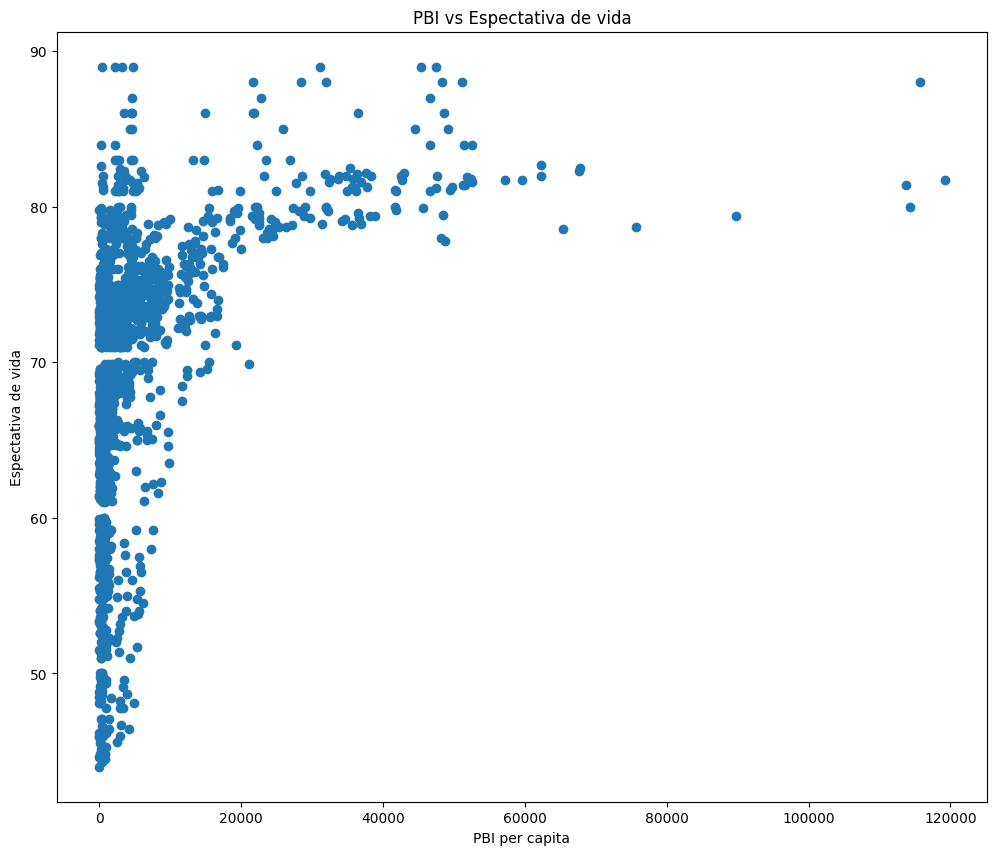

In [159]:
plt.figure(figsize=(12,10))
plt.scatter( df['GDP'],df['Life expectancy '])
plt.title("PBI vs Espectativa de vida");
plt.xlabel('PBI per capita');
plt.ylabel('Espectativa de vida')


##### Se puede observar que el grueso de la distribucion se agrupa en valores de PBI menores a 40000 dolares (incluso podria tomarse 20000 dolares), por lo que se cree que si bien esta variable guarda relacion con la espectativa de vida, no tiene un peso ponderante. No obstante, hasta no demostrarlo no hay nada seguro.

### Pregunta 3:
#### ¿Existe algun indicador cuya incidencia sobre la variable objetivo sea mayor o absoluto?Analisis individualizado por enfermedad respecto a la espectativa de vida. Luego se procedera a realizar un modelo multivariado con todas ellas para intentar alcanzar un modelo con una confianza alta.

In [160]:
vars = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ',' BMI ', 'under-five deaths ', 'Polio','Diphtheria ', ' HIV/AIDS',' thinness  1-19 years', ' thinness 5-9 years']
df_agrupado = df.groupby('Country', as_index= False)[vars].mean()

df_agrupado.head(20)

Country  Life expectancy   Adult Mortality  infant deaths  \
0              Afghanistan         58.193750       269.062500      78.250000   
1                  Albania         75.156250        45.062500       0.687500   
2                  Algeria         74.209091       102.818182      20.272727   
3                   Angola         50.675000       362.750000      76.625000   
4                Argentina         75.238462       100.384615      10.000000   
5                  Armenia         73.306667       117.333333       1.000000   
6                Australia         81.907143        62.428571       1.000000   
7                  Austria         81.480000        65.800000       0.000000   
8               Azerbaijan         71.146154       119.846154       5.769231   
9               Bangladesh         69.966667       135.666667     142.416667   
10                 Belarus         69.746667       220.266667       0.600000   
11                 Belgium         80.653333        69.933333       0.266667   
12                  Belize         69.153333       154.200000       0.000000   
13                   Benin         57.707692       269.307692      25.000000   
14                  Bhutan         65.920000       231.533333       0.733333   
15  Bosnia and Herzegovina         76.181818        63.545455       0.000000   
16                Botswana         55.406667       460.933333       2.000000   
17                  Brazil         73.273333       151.266667      70.000000   
18                Bulgaria         72.740000       124.733333       1.000000   
19            Burkina Faso         57.233333       224.000000      43.000000   

      Alcohol  Hepatitis B     Measles        BMI   under-five deaths   \
0    0.014375    64.562500  2362.250000  15.518750          107.562500   
1    4.848750    98.000000    53.375000  49.068750            0.937500   
2    0.447273    76.454545   647.000000  48.872727           23.363636   
3    7.620000    71.000000  3925.625000  18.450000          118.750000   
4    8.004615    80.307692     2.000000  54.484615           11.230769   
5    3.702667    87.133333   290.333333  44.026667            1.000000   
6   10.154286    93.428571   105.785714  54.928571            1.357143   
7   12.236000    80.266667    61.800000  47.666667            0.000000   
8    1.055385    56.384615   675.923077  43.407692            6.769231   
9    0.010000    76.000000  5096.916667  14.441667          184.833333   
10  13.497333    88.266667    26.333333  54.240000            0.933333   
11  11.042667    72.933333    83.866667  50.040000            1.000000   
12   6.252667    94.800000     0.000000  39.793333            0.000000   
13   0.951538    61.076923   593.230769  19.300000           39.153846   
14   0.278667    93.800000    84.866667  17.120000            1.000000   
15   4.600909    70.727273   303.727273  48.509091            0.000000   
16   4.670000    86.800000   253.733333  31.866667            3.200000   
17   7.213333    96.200000    87.466667  46.460000           79.266667   
18  10.865333    94.666667  1632.333333  53.753333            1.000000   
19   4.091111    80.000000  7344.555556  16.644444           74.222222   

        Polio  Diphtheria    HIV/AIDS   thinness  1-19 years  \
0   48.375000    52.312500   0.100000              16.581250   
1   98.125000    98.062500   0.100000               1.618750   
2   93.181818    93.363636   0.100000               6.000000   
3   70.875000    64.000000   2.450000               9.037500   
4   94.461538    93.692308   0.100000               1.061538   
5   88.666667    86.933333   0.100000               2.033333   
6   91.857143    92.000000   0.100000               0.671429   
7   85.533333    86.333333   0.100000               1.720000   
8   74.076923    82.153846   0.100000               2.869231   
9   87.666667    94.750000   0.100000              16.200000   
10  89.266667    91.733333   0.100000               2.233333   
11  97.666667  

Realizamos un plot por cada una de las variables, relacionadas a enfermedades, evaluadas en los datos para tratar de determinar si su grado de relacion con la variable objetivo es alto o bajo. 

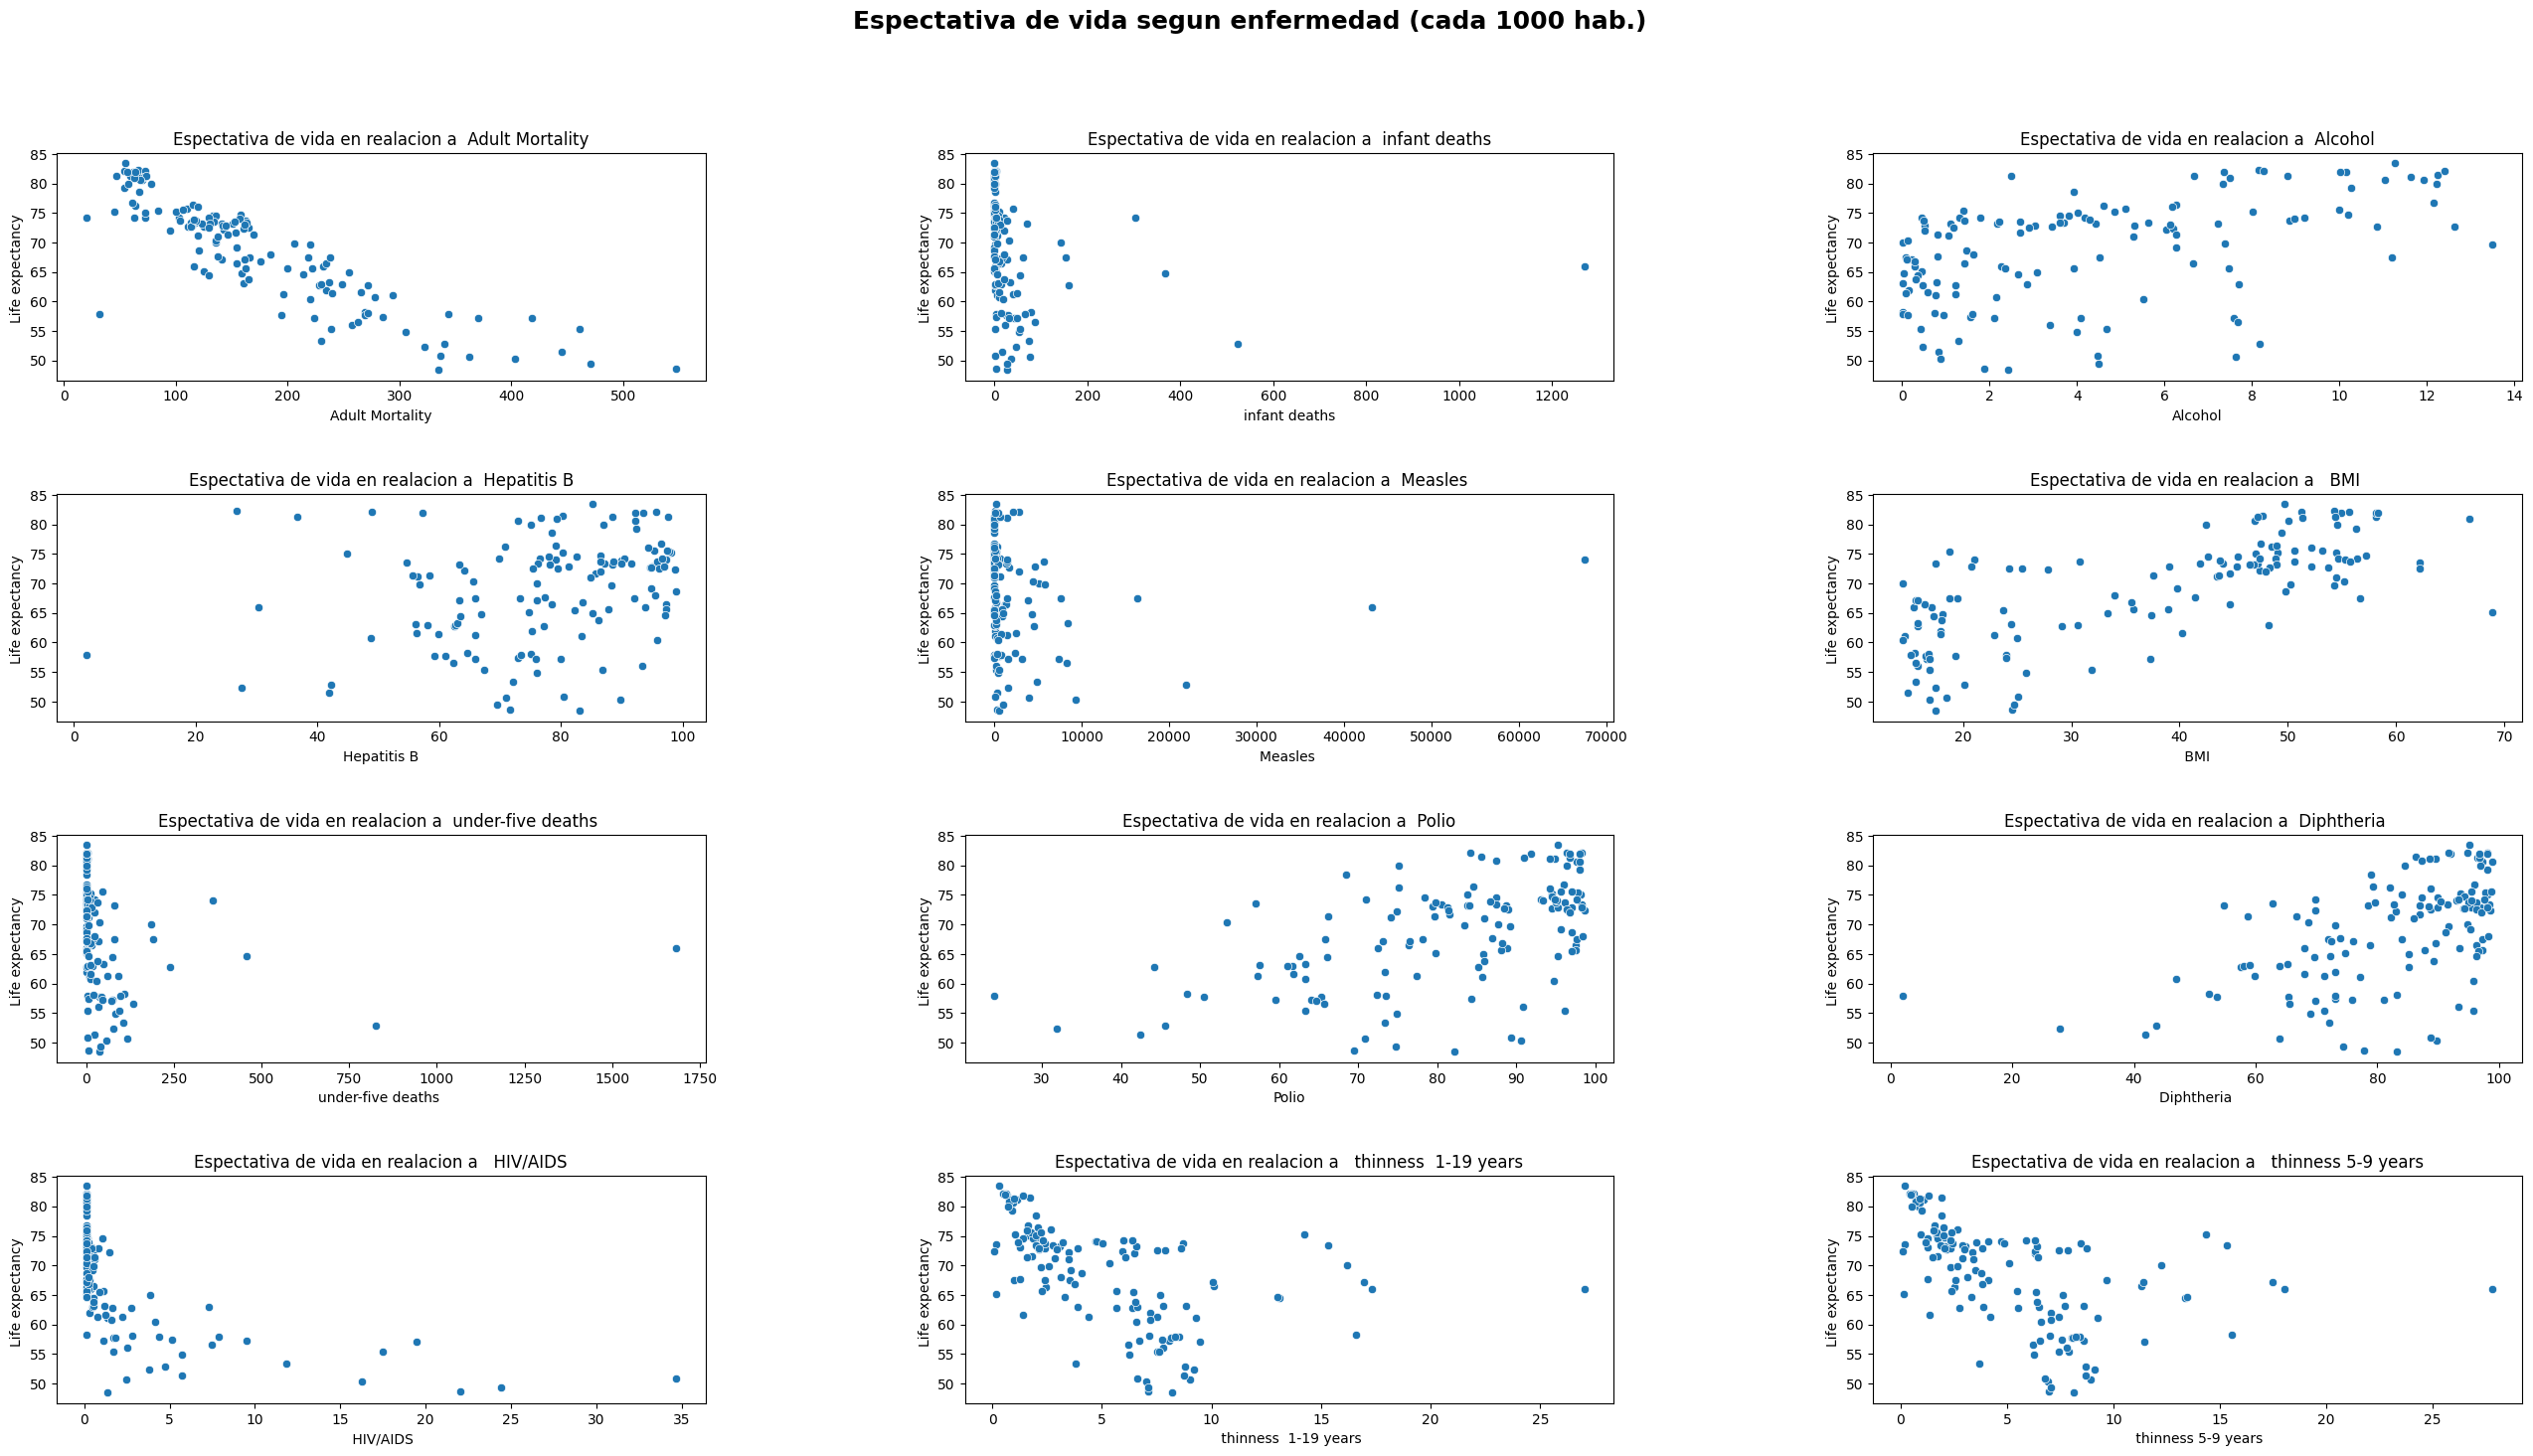

In [161]:
cont = 0
fig = plt.figure(figsize=[32,24])
fig.suptitle('Espectativa de vida segun enfermedad (cada 1000 hab.)', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
vars2 = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ',' BMI ', 'under-five deaths ', 'Polio','Diphtheria ', ' HIV/AIDS',' thinness  1-19 years', ' thinness 5-9 years']
for i in vars2:
    cont = cont + 1
    ax = fig.add_subplot(6, 3, cont).set_title(f'Espectativa de vida en realacion a  {vars2[cont-1]}') 
    ax = sns.scatterplot(data = df_agrupado,x= df_agrupado[i], y ='Life expectancy ')
    



#df_agrupado.plot.scatter(x='Life expectancy ', y =df_agrupado[i])


Podemos observar que los resultados son de lo mas variado encontrando algunas que parecen no influir directamente, otras que tienen una relacion inversa (El aumento de casos cada 1000 habitantes no implica una caida en la espectativa de vida) y otras que verdaderamente tienen una influencia muy fuerte (mortalidad adulta, thinnes 5-9 years) o que aparecen conteos mas agresivos en paises que poseen espectativas de vida inferiores (HIV por ejemplo) que posiblemente se deba a baja calidad sanitaria.

Por otro lado, es menester destacar que muchas no poseen una distribucion lineal, por lo que tal vez ese tipo de algoritmo de regresion no nos sea especialmente util

### Lo siguiente es determinar la distribucion de cada una de esas variables para evaluar simetrias y asimetrias

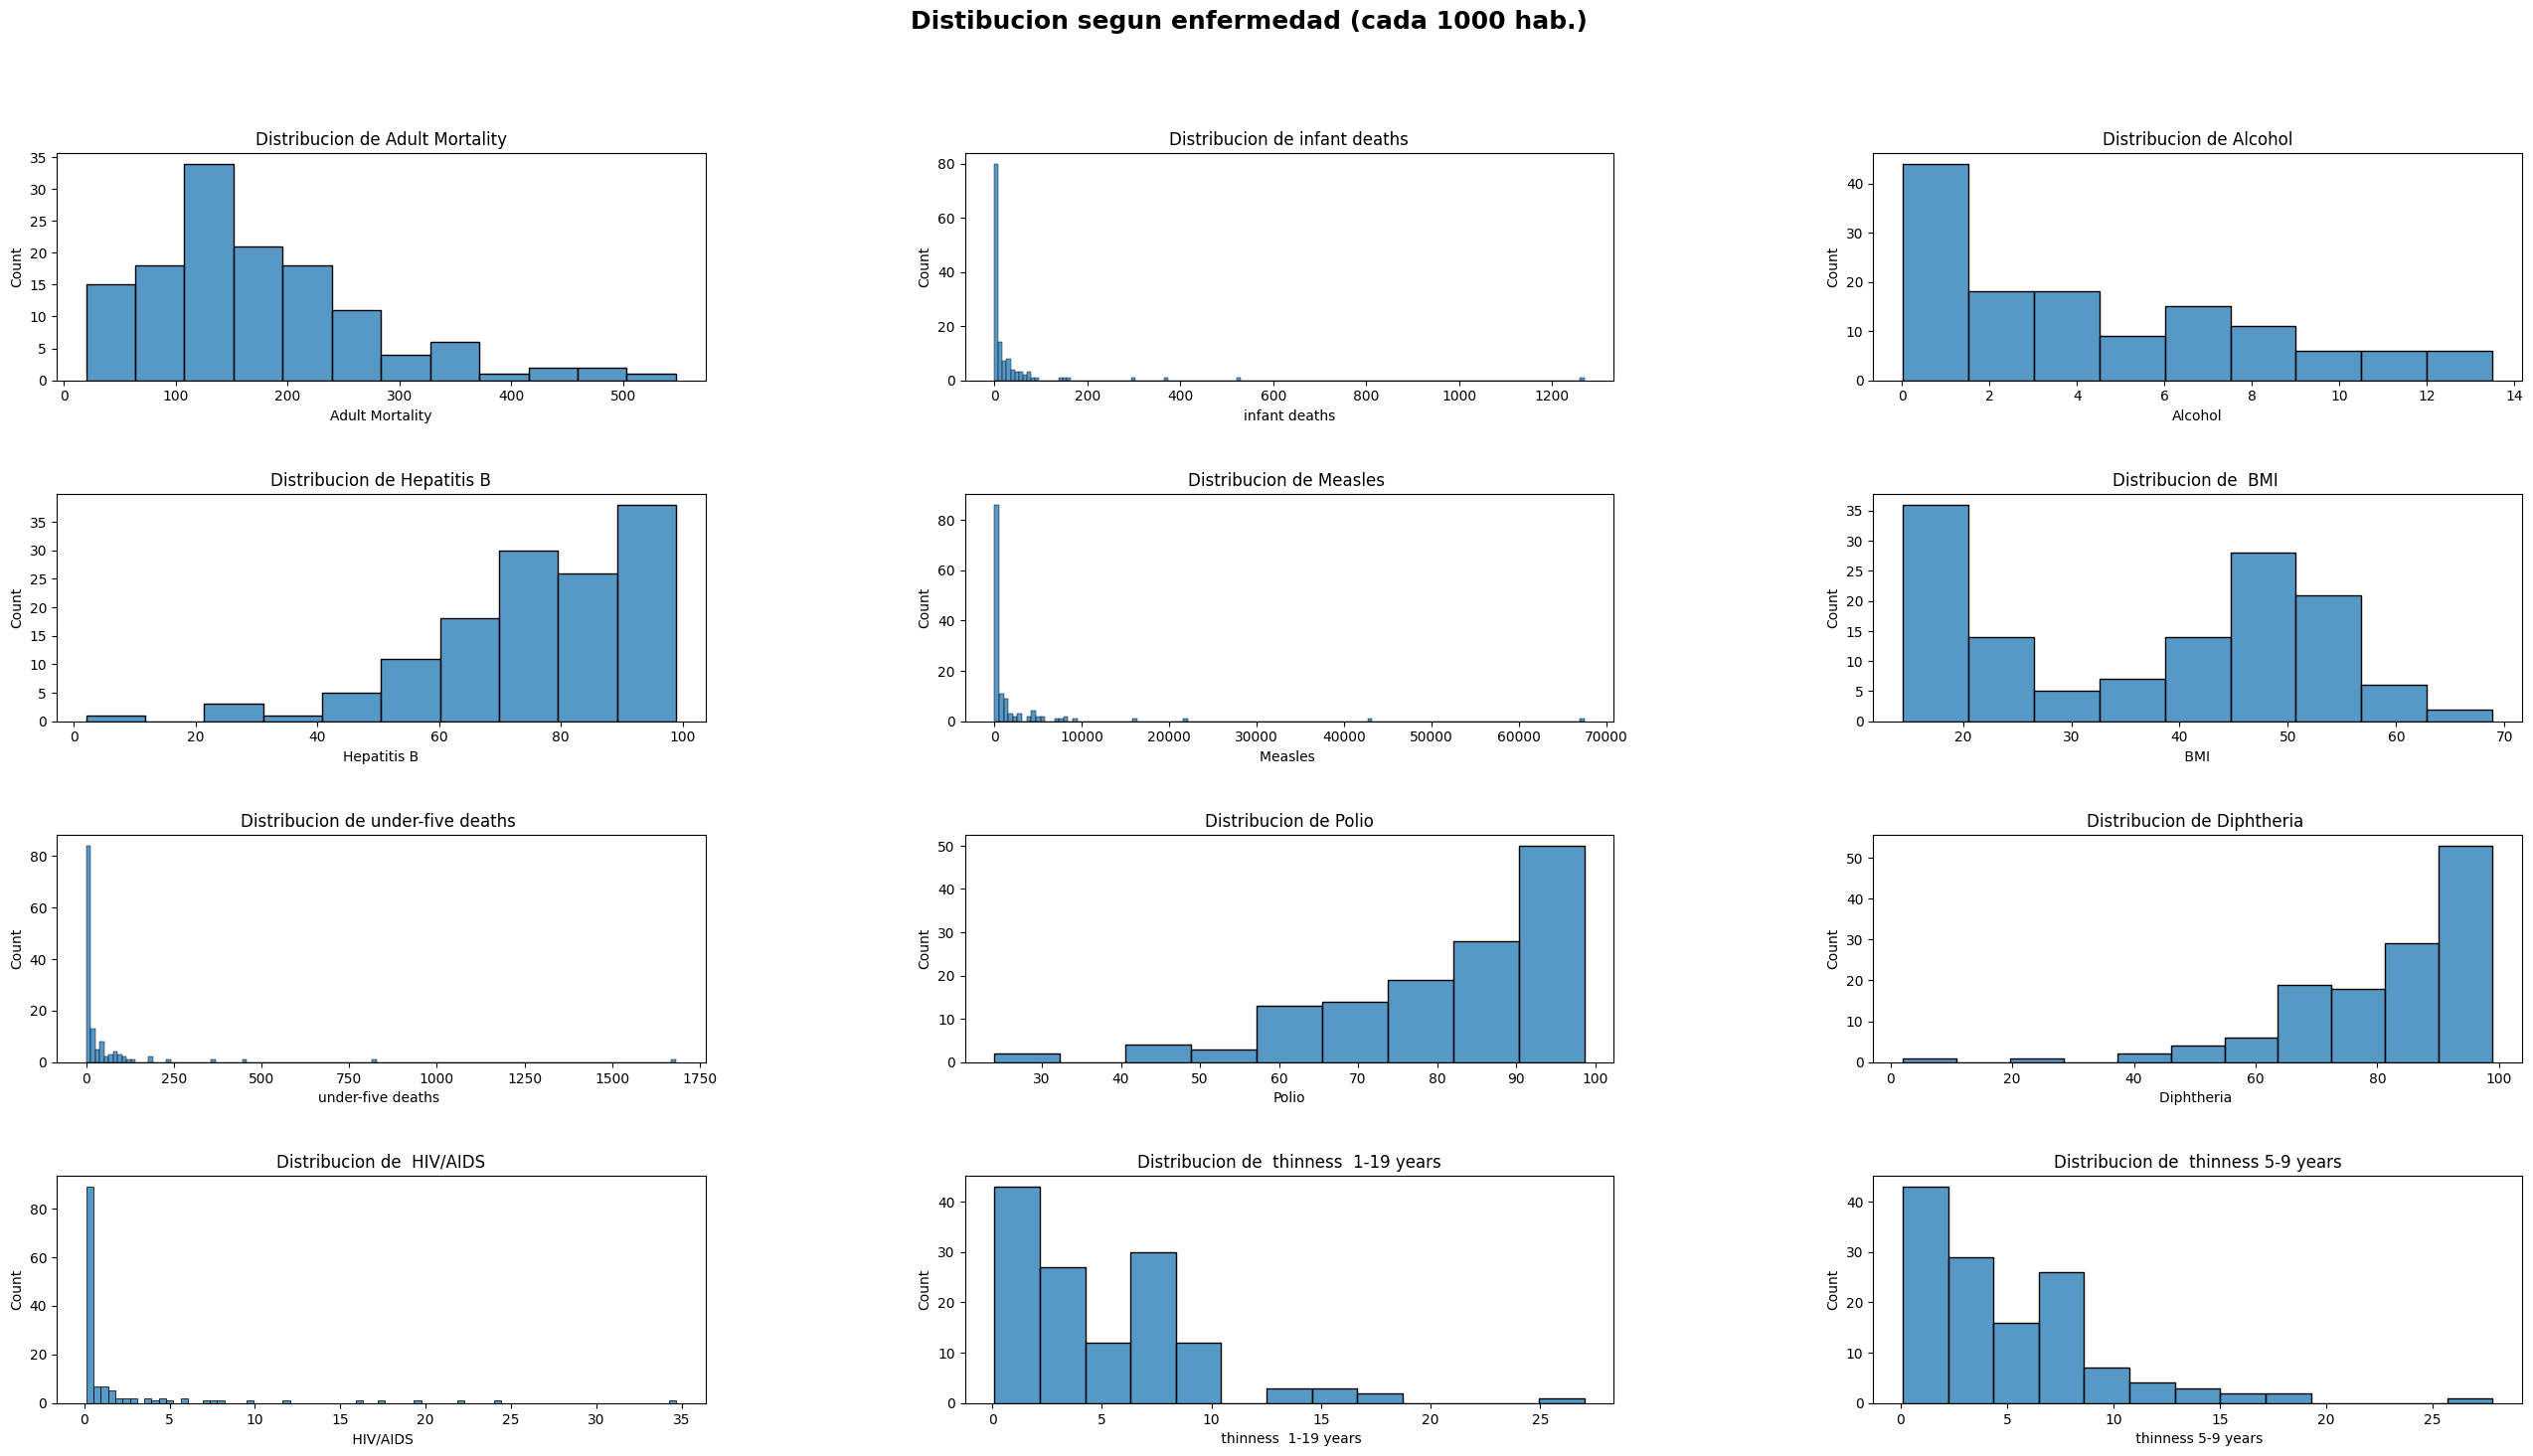

In [162]:
cont = 0
fig = plt.figure(figsize=[32,24])
fig.suptitle('Distibucion segun enfermedad (cada 1000 hab.)', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
vars2 = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 'Measles ',' BMI ', 'under-five deaths ', 'Polio','Diphtheria ', ' HIV/AIDS',' thinness  1-19 years', ' thinness 5-9 years']
for i in vars2:
    cont = cont + 1
    ax = fig.add_subplot(6, 3, cont).set_title(f'Distribucion de {vars2[cont-1]}') 
    ax = sns.histplot(x= df_agrupado[i])
    

 Se puede observar que son todas asimetricas, algunas orientadas a la izq y otras a la derecha

##### Se plotea el Gasto total en salud con respecto a la espectativa de vida y la distribucion a nivel mundial del gasto en salud, de manera de poder establecer una relacion entre ambas variables y determinar si es un factor influyente 

<AxesSubplot: title={'center': 'Espectativa de vida en funcion de Gasto total en salud'}, xlabel='Gasto Total en Salud', ylabel='Life expectancy '>

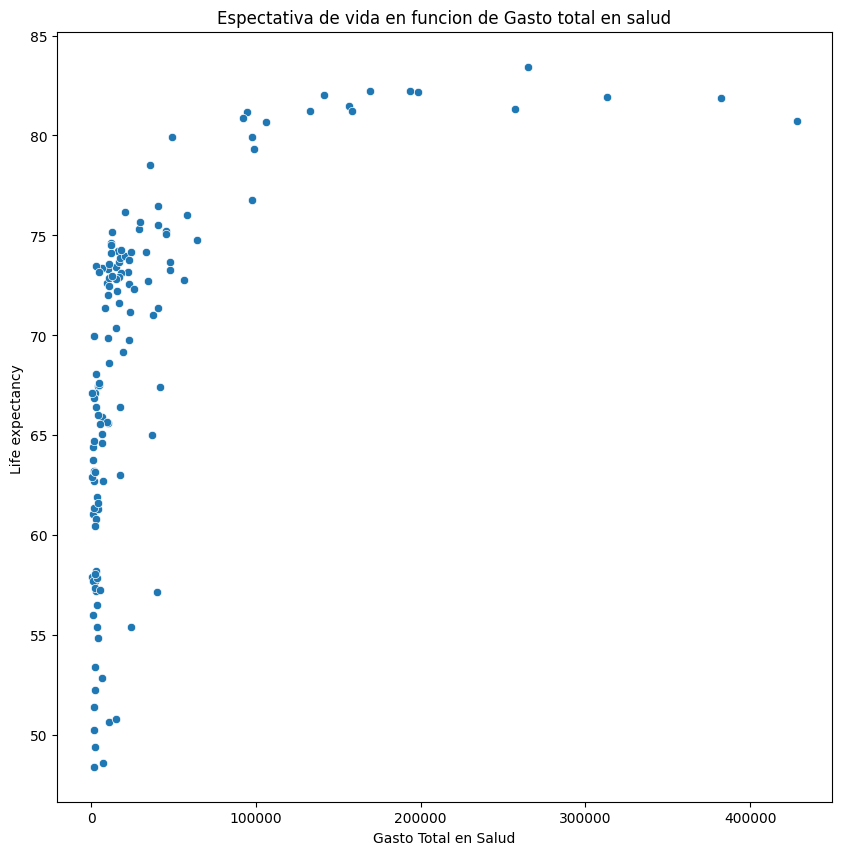

In [163]:
vars = ['Life expectancy ','Total expenditure','GDP']
df_GDP = df.groupby('Country', as_index= False)[vars].mean()
Gasto_Total = df_GDP['Total expenditure'] * df_GDP['GDP']
df_life = df_GDP['Life expectancy ']
df_GDP = df_GDP.reset_index(drop=True)
Gasto_Total = Gasto_Total.reset_index(drop=True)

df_Sanit = pd.concat([df_life,Gasto_Total],axis =1)
df_Sanit = df_Sanit.set_axis(['Life expectancy ', 'Gasto Total en Salud'],axis = 1)

df_Sanit.head()

plt.figure(figsize=(10,10))
plt.title('Espectativa de vida en funcion de Gasto total en salud')
sns.scatterplot(data = df_Sanit,x='Gasto Total en Salud', y ='Life expectancy ')




<AxesSubplot: title={'center': 'Distribucion del Gasto total en salud'}, xlabel='Gasto Total en Salud', ylabel='Count'>

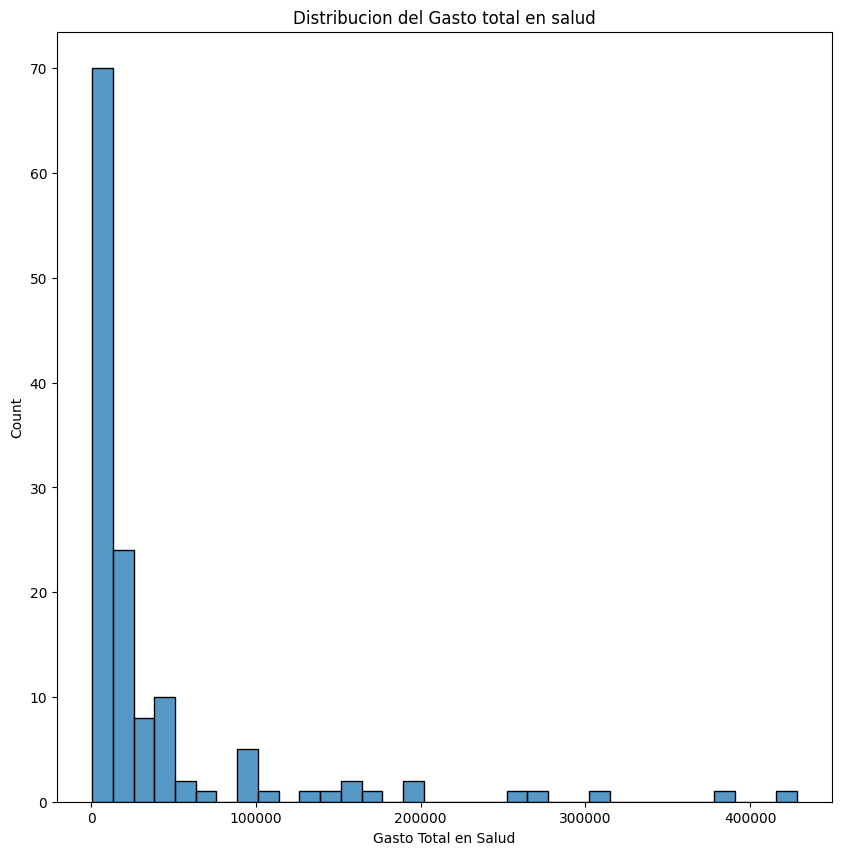

In [164]:
plt.figure(figsize=(10,10))
plt.title('Distribucion del Gasto total en salud')
sns.histplot(x= df_Sanit['Gasto Total en Salud'])

# Modelo de Regresion Lineal

#### En primera instancia vamos a realizar modelos teniendo en consideracion pocas variables para analizar los parametros del mismo, luego vamos a ir agregando mas variables y detectando cual o cuales son las que tienen mas relevancia para el analisis

In [165]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

#### Renombraremos los indices de las columnas para poder generar el modelo

In [166]:
df = df.set_axis(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'infantDeaths', 'Alcohol', 'PercentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'UnderFiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIVAIDS', 'GDP', 'Population',
       'Thinness119years', 'Thinness59years',
       'IncomeCompositionOfResources', 'Schooling'], axis=1)

In [167]:
df.columns

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'infantDeaths', 'Alcohol', 'PercentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'UnderFiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIVAIDS', 'GDP', 'Population', 'Thinness119years',
       'Thinness59years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

In [168]:
model1 = 'LifeExpectancy~AdultMortality + Year'
lm1 = sma.ols(formula=model1, data= df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     804.0
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          2.57e-244
Time:                        13:19:07   Log-Likelihood:                -5363.0
No. Observations:                1649   AIC:                         1.073e+04
Df Residuals:                    1646   BIC:                         1.075e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -29.3433     75.808     -0.

Podemos ver que, si bien el R-squared no alcanza el valor requerido para que el modelo pueda ser considerado en primera instancia apto, pero si es una variable que suma mucho a la confianza del modelo. Procederemos a agregar mas informacion del dataset para evaluar.

In [169]:
model1 = 'LifeExpectancy~AdultMortality  + Year + infantDeaths'
lm1 = sma.ols(formula=model1, data= df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     579.1
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          7.68e-257
Time:                        13:19:07   Log-Likelihood:                -5330.6
No. Observations:                1649   AIC:                         1.067e+04
Df Residuals:                    1645   BIC:                         1.069e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -34.8901     74.359     -0.

Podemos ver que agragando las muertes de infantes no suma tanto al modelo en si. Procederemos a agregar algunas de las que fuimos viendo como significantes.

In [170]:
model1 = 'LifeExpectancy~AdultMortality + Year + infantDeaths + BMI + GDP + TotalExpenditure + Country'
lm1 = sma.ols(formula=model1, data= df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     251.2
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:19:07   Log-Likelihood:                -3306.0
No. Observations:                1649   AIC:                             6890.
Df Residuals:                    1510   BIC:                             7642.
Df Model:                         138                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

 Analizando un poco podemos detectar lo siguiente, el indice de mortalidad depende solamente del nivel de mortalidad adulta y del pais en el que la persona se encuentra. Realizamos un modelo solo con esas dos variables (y el año) para comprobarlo.

In [171]:


model1 = 'LifeExpectancy~ AdultMortality + Country + Year'
lm1 = sma.ols(formula=model1, data= df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     258.9
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:19:07   Log-Likelihood:                -3307.4
No. Observations:                1649   AIC:                             6885.
Df Residuals:                    1514   BIC:                             7615.
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

 Podemos ver que nuestra suposicion es correcta. A pesar de que el R-squared cae un poco, la misma es muy pequeña. 
 
 Otro analisis posible es que la expectativa de vida no depende tanto de las enfermedades que la gente contraiga sino de las condiciones de bienestar y calidad de vida generales de cada uno de los paises. 

 Podemos ir un paso mas allá y dejar solo al Pais como determinante de la espectativa de vida. Si bien esto, en principio resuelve nuestras necesidades, estaria interesante poder determinar cuales son los factores internos de un pais que hacen que tengan una espectativa de vida mas alta.

In [172]:
model1 = 'LifeExpectancy~ Country + Year'
lm1 = sma.ols(formula=model1, data= df).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     258.3
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        13:19:08   Log-Likelihood:                -3315.8
No. Observations:                1649   AIC:                             6900.
Df Residuals:                    1515   BIC:                             7624.
Df Model:                         133                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

 Podemos ver que tanto el R-squared como el Adj. R-squared son similares y altos lo que indica que es un modelo que explica el 95% de la variabiliadad. Por otro lado,  el p en la mayoria de los coeficientes del modelo lineal es 0 con lo cual tenemos un modelo donde la mayoria de los factores son importantes para el analisis, sin embargo existen algunos con un p != 0 lo que indican que no seran importantes para el modelo ya que no existira relacion entre la variable objetivo y ellos.

# Ingenieria de Factores

Comenzamos con ingenieria de factores para poder determinar cuales son las variables mas importantes para el desarrollo de nuestro modelo.

Para esto, primero tenemos que "Limpiar" un poco nuestro Dataset. Evaluaremos outlyers y entradas que no tengan un tipo de dato correcto.

El primer paso es convertir los datos sin procesar en un marco de datos que incluya la variable objetivo y los datos reales con los nombres de las funciones

In [173]:
df.head()
df.columns

Index(['Country', 'Year', 'Status', 'LifeExpectancy', 'AdultMortality',
       'infantDeaths', 'Alcohol', 'PercentageExpenditure', 'HepatitisB',
       'Measles', 'BMI', 'UnderFiveDeaths', 'Polio', 'TotalExpenditure',
       'Diphtheria', 'HIVAIDS', 'GDP', 'Population', 'Thinness119years',
       'Thinness59years', 'IncomeCompositionOfResources', 'Schooling'],
      dtype='object')

In [174]:
X = df.drop("LifeExpectancy", axis=1)
Y= df["LifeExpectancy"]

In [189]:
X.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937],
           dtype='int64', length=1649)

In [175]:
#IQR
X_r = X.copy()
X_r = X_r.drop(['Country', 'Year', 'Status'], axis=1)
q1 = X_r.quantile(0.25)
q3 = X_r.quantile(0.75)
iqr = q3 - q1
X_f = X_r.copy()
X_f['outlier_iqr'] = X_f.apply(lambda row: 1 if any(np.abs(row - q3) > 1.5*iqr) else 0, axis=1)
# Tukey
med = X_r.median()
X_f['outlier_tukey']=X_f.drop(columns='outlier_iqr').apply(lambda row: 1 if any(np.abs(row - med) > 1.5*iqr) else 0, axis=1)
X_f

AdultMortality  infantDeaths  Alcohol  PercentageExpenditure  \
0              263.0            62     0.01              71.279624   
1              271.0            64     0.01              73.523582   
2              268.0            66     0.01              73.219243   
3              272.0            69     0.01              78.184215   
4              275.0            71     0.01               7.097109   
...              ...           ...      ...                    ...   
2933           723.0            27     4.36               0.000000   
2934           715.0            26     4.06               0.000000   
2935            73.0            25     4.43               0.000000   
2936           686.0            25     1.72               0.000000   
2937           665.0            24     1.68               0.000000   

      HepatitisB  Measles   BMI  UnderFiveDeaths  Polio  TotalExpenditure  \
0           65.0     1154  19.1               83    6.0              8.16   
1           62.0      492  18.6               86   58.0              8.18   
2           64.0      430  18.1               89   62.0              8.13   
3           67.0     2787  17.6               93   67.0              8.52   
4           68.0     3013  17.2               97   68.0              7.87   
...          ...      ...   ...              ...    ...               ...   
2933        68.0       31  27.1               42   67.0              7.13   
2934         7.0      998  26.7               41    7.0              6.52   
2935        73.0      304  26.3               40   73.0              6.53   
2936        76.0      529  25.9               39   76.0              6.16   
2937        79.0     1483  25.5               39   78.0              7.10   

      Diphtheria  HIVAIDS         GDP  Population  Thinness119years  \
0           65.0      0.1  584.259210  33736494.0              17.2   
1           62.0      0.1  612.696514    327582.0              17.5   
2           64.0      0.1  631.744976  31731688.0              17.7   
3           67.0      0.1  669.959000   3696958.0              17.9   
4           68.0      0.1   63.537231   2978599.0              18.2   
...          ...      ...         ...         ...               ...   
2933        65.0     33.6  454.366654  12777511.0               9.4   
2934        68.0     36.7  453.351155  12633897.0               9.8   
2935        71.0     39.8   57.348340    125525.0               1.2   
2936        75.0     42.1  548.587312  12366165.0               1.6   
2937        78.0     43.5  547.358878  12222251.0              11.0   

      Thinness59years  IncomeCompositionOfResources  Schooling  outlier_iqr  \
0                17.3                         0.479       10.1            1   
1                17.5                         0.476       10.0            1   
2                17.7                         0.470        9.9            1   
3                18.0                         0.463        9.8            1   
4                18.2                         0.454        9.5            1   
...               ...                           ...        ...          ...   
2933              9.4                         0.407        9.2            1   
2934              9.9                         0.418        9.5            1   
2935              1.3                         0.427       10.0            1   
2936              1.7                         0.427        9.8            1   
2937             11.2                         0.434        9.8            1   

      outlier_tukey  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  
...             ...  
2933              1  
2934              1  
2935              1  
2936              1  
2937              1  

[1649 rows x 20 columns]

In [176]:
X_f['outlier_iqr'].value_counts()

1    1108
0     541
Name: outlier_iqr, dtype: int64

In [177]:
X_f['outlier_tukey'].value_counts()

1    1200
0     449
Name: outlier_tukey, dtype: int64

In [178]:
X_f[~((X_f['outlier_iqr']==1) & (X_f['outlier_tukey']==1))]

AdultMortality  infantDeaths  Alcohol  PercentageExpenditure  \
16              74.0             0     4.60             364.975229   
17               8.0             0     4.51             428.749067   
18              84.0             0     4.76             430.876979   
19              86.0             0     5.14             412.443356   
20              88.0             0     5.37             437.062100   
...              ...           ...      ...                    ...   
2835           185.0            23     1.96              77.270921   
2836           192.0            24     1.78              40.133421   
2837           183.0            24     1.59              34.418872   
2838           183.0            25     1.54              28.521358   
2839           186.0            27     1.47              24.994387   

      HepatitisB  Measles   BMI  UnderFiveDeaths  Polio  TotalExpenditure  \
16          99.0        0  58.0                0   99.0              6.00   
17          98.0        0  57.2                1   98.0              5.88   
18          99.0        0  56.5                1   99.0              5.66   
19          99.0        9  55.8                1   99.0              5.59   
20          99.0       28  55.1                1   99.0              5.71   
...          ...      ...   ...              ...    ...               ...   
2835        98.0      823  38.1               27   94.0              5.49   
2836        99.0      737  37.5               28   99.0              5.11   
2837        99.0       75  37.0               29   99.0              5.11   
2838        99.0       85  36.4               30   99.0              5.17   
2839        62.0       25  35.9               32   99.0              5.44   

      Diphtheria  HIVAIDS          GDP  Population  Thinness119years  \
16          99.0      0.1  3954.227830     28873.0               1.2   
17          98.0      0.1  4575.763787    288914.0               1.2   
18          99.0      0.1  4414.723140    289592.0               1.3   
19          99.0      0.1  4247.614380      2941.0               1.3   
20          99.0      0.1  4437.178680    295195.0               1.4   
...          ...      ...          ...         ...               ...   
2835        96.0      0.4   654.283837   2648825.0               3.2   
2836        99.0      0.3   546.776852     26167.0               3.2   
2837        99.0      0.3   465.119887   2586435.0               3.2   
2838        98.0      0.3   396.129969   2556765.0               3.3   
2839        99.0      0.2   383.349500   2527185.0               3.3   

      Thinness59years  IncomeCompositionOfResources  Schooling  outlier_iqr  \
16                1.3                         0.762       14.2            0   
17                1.3                         0.761       14.2            0   
18                1.4                         0.759       14.2            0   
19                1.4                         0.752       14.2            0   
20                1.5                         0.738       13.3            0   
...               ...                           ...        ...          ...   
2835              3.2                         0.626       11.8            0   
2836              3.2                         0.620       11.7            0   
2837              3.2                         0.613       11.6            0   
2838              3.3                         0.607       11.3            0   
2839              3.3                         0.600       11.0            1   

      outlier_tukey  
16                0  
17                0  
18                0  
19                0  
20                0  
...             ...  
2835              1  
2836              1  
2837              0  
2838              0  
2839              0  

[582 rows x 20 columns]

In [200]:
indexes = X_f[~((X_f['outlier_iqr']==1) & (X_f['outlier_tukey']==1))].index

In [207]:
X_n= X_r.loc[indexes]
y_n= Y.loc[indexes]
X_n.index

Int64Index([  16,   17,   18,   19,   20,   21,   22,   23,   24,   25,
            ...
            2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839],
           dtype='int64', length=582)

In [208]:
y_n.shape


(582,)

In [209]:
X_n.shape

(582, 18)

Ahora si, ejecutamos el algoritmo de forward selection para determinar cuales son las caracteristicas mas importantes para predecir la variable objetivo

### Forward Elimination

In [210]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist() # lista con columnas
    best_features = [] # lista vacia para guardar features significativos
    while (len(initial_features)>0): # siempre y cuando esto sea mayor que 0 seguir
        remaining_features = list(set(initial_features)-set(best_features)) # operacion diferencia todas - features que van saliendo
        new_pval = pd.Series(index=remaining_features) # seria para guardar p valores
        for new_column in remaining_features: # para las columnas restates seguir evaluando
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit() # ajustar el modelo con target agregando columnas de una en una
            new_pval[new_column] = model.pvalues[new_column] # agregar a la serie el p valor para cada feature
        min_p_value = new_pval.min() # encontrar el p valor minimo (mas significativo)
        if(min_p_value<significance_level): # verificar si es menor a alpha
            best_features.append(new_pval.idxmin()) # agregar el nombre del feature
        else:
            break # cuando no se cumpla la condicion parar y salir
    return best_features

In [211]:
X_n.columns

Index(['AdultMortality', 'infantDeaths', 'Alcohol', 'PercentageExpenditure',
       'HepatitisB', 'Measles', 'BMI', 'UnderFiveDeaths', 'Polio',
       'TotalExpenditure', 'Diphtheria', 'HIVAIDS', 'GDP', 'Population',
       'Thinness119years', 'Thinness59years', 'IncomeCompositionOfResources',
       'Schooling'],
      dtype='object')

In [212]:
import warnings
warnings.filterwarnings("ignore")
forward_selection(X_n,y_n)

['IncomeCompositionOfResources',
 'AdultMortality',
 'TotalExpenditure',
 'Schooling',
 'HIVAIDS',
 'Diphtheria']

In [213]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [214]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [215]:
sfs.fit(X_n, y_n)
sfs.k_feature_names_ 

('AdultMortality',
 'Measles',
 'TotalExpenditure',
 'Diphtheria',
 'HIVAIDS',
 'GDP',
 'IncomeCompositionOfResources',
 'Schooling')

In [218]:
sfs.fit(X_r, Y)
sfs.k_feature_names_ 

('AdultMortality',
 'PercentageExpenditure',
 'BMI',
 'UnderFiveDeaths',
 'Diphtheria',
 'HIVAIDS',
 'IncomeCompositionOfResources',
 'Schooling')

In [224]:
model1 = 'LifeExpectancy~AdultMortality + Measles + TotalExpenditure + Diphtheria + HIVAIDS + GDP + IncomeCompositionOfResources + Schooling'
lm1 = sma.ols(formula=model1, data= df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     918.5
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:11:57   Log-Likelihood:                -4522.3
No. Observations:                1649   AIC:                             9063.
Df Residuals:                    1640   BIC:                             9111.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [221]:
model1 = 'LifeExpectancy~AdultMortality + PercentageExpenditure + BMI + UnderFiveDeaths + Diphtheria + HIVAIDS + IncomeCompositionOfResources + Schooling'
lm1 = sma.ols(formula=model1, data= df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     961.7
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:04:05   Log-Likelihood:                -4491.2
No. Observations:                1649   AIC:                             9000.
Df Residuals:                    1640   BIC:                             9049.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Podemos ver que el modelo conseguido tomando los parametros obtenidos del algoritmo de Forward Selection nos entrega una confianza del 82% en ambos casos, (no teniendo en cuenta y si,  los outlyers, a pesar de que la seleccion de parametros es distinta). Es importante destacar que en el primer caso, el parametro P no es 0 para todas las variables.Lo cual es un indicador de que llegado el caso, al modelo no le va a servir esa variable. Por otro lado, en el 2do caso, cuando si se tienen en cuenta los outlyers, el modelo gana en prediccion y todas las variables son importantes ya que el P nunca es 0. Y que ademas las variables que usa no son los paises como en los modelos anteriores, Sino variables que pueden alcanzar el objetivo de una manera mas generalistica.

Porbemos ahora con otro algoritmo de seleccion de parametros como el Backward_elimination

### Backward elimination

In [222]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist() # arrancamos con todas las columnas
    while(len(features)>0): # siempre y cuando haya mas de 1 feature seguir
        features_with_constant = sm.add_constant(data[features]) # hacer el modelo con todas las variables e ir removiendo
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:] # ajustar el modelo y sacar p valores
        max_p_value = p_values.max() # sacar el p valor maximo
        if(max_p_value >= significance_level): # verificar si es mayor a la significancia
            excluded_feature = p_values.idxmax() # de ser asi remover el feature por ser no significativo
            features.remove(excluded_feature) # remover de la lista de fetures
        else:
            break # cuando no se cumpla el if se parara el ciclo
    return features

In [223]:
backward_elimination(X_n,y_n)

['AdultMortality',
 'infantDeaths',
 'PercentageExpenditure',
 'UnderFiveDeaths',
 'TotalExpenditure',
 'Diphtheria',
 'HIVAIDS',
 'GDP',
 'IncomeCompositionOfResources',
 'Schooling']

In [225]:
model1 = 'LifeExpectancy~AdultMortality + infantDeaths +  PercentageExpenditure + TotalExpenditure +  UnderFiveDeaths + Diphtheria + HIVAIDS + GDP + IncomeCompositionOfResources + Schooling'
lm1 = sma.ols(formula=model1, data= df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         LifeExpectancy   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     794.4
Date:                Sat, 04 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:17:55   Log-Likelihood:                -4468.5
No. Observations:                1649   AIC:                             8959.
Df Residuals:                    1638   BIC:                             9018.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       